In [2]:
import os
from matplotlib import pyplot as plt
from os.path import join, dirname
from os import  getcwd
from pathlib import Path  # Add this import


PATH_REPO = getcwd()
PROTON_DRIVE = Path(os.path.join(os.path.expanduser("~"), "Proton Drive"))  # Change to Path
PROTON_DRIVE_PATH = next(p for p in PROTON_DRIVE.glob('**/handwrittenOCR') if 'Proton Drive' in str(p).replace('\\', '/'))
PROTON_DRIVE, PROTON_DRIVE_PATH

(WindowsPath('C:/Users/marie/Proton Drive'),
 WindowsPath('C:/Users/marie/Proton Drive/marie.beigelman/Shared with me/handwrittenOCR'))

In [3]:
#path to images
PATH_DATA = os.path.join(PROTON_DRIVE_PATH, "data")

#path to csv
PATH_ANNOTATIONS = os.path.join(PROTON_DRIVE_PATH, "annotations")


Split annotation csv into train and val
 - list all images in train and val
 - open csv, split into train and val
 - save train and val csv into label folder
 




In [6]:
#list all images in train and val
list_train = os.listdir(os.path.join(PATH_DATA, "20241111_yolo", "images", "train"))
list_val = os.listdir(os.path.join(PATH_DATA, "20241111_yolo", "images", "val"))
list_train, list_val



(['FRANOM22_COLH78_0261_0232.jpg',
  'FRANOM22_COLH78_0261_0233.jpg',
  'FRANOM22_COLH78_0261_0234.jpg',
  'FRANOM22_COLH78_0261_0235.jpg',
  'FRANOM22_COLH78_0261_0236.jpg',
  'FRANOM22_COLH78_0484_0220.jpg',
  'FRANOM22_COLH78_0484_0221.jpg',
  'FRANOM22_COLH78_0484_0222.jpg',
  'FRANOM22_COLH78_0484_0223.jpg',
  'FRANOM22_COLH78_0484_0397.jpg',
  'FRANOM22_COLH78_0484_0398.jpg',
  'FRANOM22_COLH78_0485_0112.jpg',
  'FRANOM22_COLH78_0485_0114.jpg',
  'FRANOM22_COLH78_0485_0115.jpg',
  'FRANOM22_COLH78_0486_0027.jpg',
  'FRANOM22_COLH78_0486_0028.jpg',
  'FRANOM22_COLH78_0486_0044.jpg',
  'FRANOM22_COLH78_0487_0124.jpg',
  'FRANOM22_COLH78_0487_0125.jpg',
  'FRANOM22_COLH78_0487_0294.jpg',
  'FRANOM22_COLH78_0487_0401.jpg',
  'FRANOM22_COLH78_0487_0511.jpg',
  'FRANOM22_COLH78_0487_0512.jpg',
  'FRANOM58_078MIOM0841_0008.jpg',
  'FRANOM58_078MIOM0841_0009.jpg',
  'FRANOM58_078MIOM0870_0035.jpg',
  'FRANOM58_078MIOM0870_0036.jpg',
  'FRANOM58_078MIOM0870_0063.jpg',
  'FRANOM58_078MIOM0

In [8]:
#open annotation csv, split into train and val
import pandas as pd
csv = pd.read_csv(os.path.join(PATH_ANNOTATIONS, "20281111_yolo_csv.csv"))
csv

filename  file_size  \
0    FRANOM22_COLH78_0261_0232.jpg    1040849   
1    FRANOM22_COLH78_0261_0232.jpg    1040849   
2    FRANOM22_COLH78_0261_0232.jpg    1040849   
3    FRANOM22_COLH78_0261_0232.jpg    1040849   
4    FRANOM22_COLH78_0261_0232.jpg    1040849   
..                             ...        ...   
240  FRANOM58_078MIOM0841_0028.jpg     966062   
241  FRANOM58_078MIOM1282_0434.jpg    1079224   
242  FRANOM58_078MIOM1282_0434.jpg    1079224   
243  FRANOM58_078MIOM1282_0434.jpg    1079224   
244  FRANOM58_078MIOM1282_0434.jpg    1079224   

                                       file_attributes  region_count  \
0    {"caption":"","public_domain":"no","image_url"...             7   
1    {"caption":"","public_domain":"no","image_url"...             7   
2    {"caption":"","public_domain":"no","image_url"...             7   
3    {"caption":"","public_domain":"no","image_url"...             7   
4    {"caption":"","public_domain":"no","image_url"...             7   
..                                                 ...           ...   
240  {"caption":"","public_domain":"no","image_url"...             5   
241  {"caption":"","public_domain":"no","image_url"...             4   
242  {"caption":"","public_domain":"no","image_url"...             4   
243  {"caption":"","public_domain":"no","image_url"...             4   
244  {"caption":"","public_domain":"no","image_url"...             4   

     region_id                            region_shape_attributes  \
0            0  {"name":"rect","x":806,"y":175,"width":1088,"h...   
1            1  {"name":"rect","x":797,"y":442,"width":1501,"h...   
2            2  {"name":"rect","x":1117,"y":1399,"width":1175,...   
3            3  {"name":"rect","x":826,"y":1676,"width":1180,"...   
4            4  {"name":"rect","x":277,"y":282,"width":495,"he...   
..         ...                                                ...   
240          4  {"name":"rect","x":93,"y":216,"width":595,"hei...   
241          0  {"name":"rect","x":740,"y":1568,"width":1008,"...   
242          1  {"name":"rect","x":92,"y":1488,"width":659,"he...   
243          2  {"name":"rect","x":140,"y":790,"width":1602,"h...   
244          3  {"name":"rect","x":416,"y":79,"width":1307,"he...   

             region_attributes  
0            {"Class":"titre"}  
1        {"Class":"par_conda"}  
2    {"Class":"txt_signature"}  
3    {"Class":"txt_signature"}  
4            {"Class":"titre"}  
..                         ...  
240          {"Class":"titre"}  
241      {"Class":"par_conda"}  
242   {"Class":"margin_perso"}  
243          {"Class":"titre"}  
244          {"Class":"titre"}  

[245 rows x 7 columns]

In [16]:
train=csv[csv["filename"].isin(list_train)]
val=csv[csv["filename"].isin(list_val)]
len(csv), len(train), len(val)

#save train and val csv into label folder
train.to_csv(os.path.join(PATH_DATA, "20241111_yolo", "labels", "train", "train.csv"), index=False)
val.to_csv(os.path.join(PATH_DATA, "20241111_yolo", "labels", "val", "val.csv"), index=False)


Generate train and val .txt file by images



In [19]:

from PIL import Image, ImageDraw

PATH_FOLDER = join(PATH_DATA, "20241111_yolo")

class_mapping = {
    'titre': 0,
    'margin_perso': 1,
    'par_conda': 2,
    'txt_add': 3,
    'txt_signature': 4,
    'table_col': 5,
    'noise': 6
}


with open(join(PATH_FOLDER, "config.yaml"), 'r') as f:
    yaml_content = f.read()

    
def process_image_set(df, path_folder, subset='train'):

    source_images_dir = join(path_folder, "images", subset)
    output_dir = join(path_folder, "labels", subset)

    unique_images = df['filename'].unique()

    for img_name in unique_images:
        img_annotations = df[df['filename'] == img_name]
        
        img = Image.open(join(source_images_dir, img_name))
        img_width = img.width
        img_height = img.height
        
        label_lines = []
        for _, row in img_annotations.iterrows():
            # Extract the coordinates
            region_attrs = eval(row['region_shape_attributes'])
            x = region_attrs['x']
            y = region_attrs['y']
            w = region_attrs['width']
            h = region_attrs['height']
            
            # Convert in YOLO  format (normalized)
            x_center = (x + w/2) / img_width
            y_center = (y + h/2) / img_height
            width = w / img_width
            height = h / img_height
            
            # Get the class
            class_name = eval(row['region_attributes'])['Class']
            class_id = class_mapping[class_name]
            
            # Créer la ligne au format YOLO
            label_lines.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")
        
        # Write the label file
        label_path = join(output_dir, os.path.splitext(img_name)[0] + '.txt')
        with open(label_path, 'w') as f:
            f.write('\n'.join(label_lines))

# Process the train and val sets
process_image_set(train, PATH_FOLDER,'train')
process_image_set(val, PATH_FOLDER,'val')



In [38]:
import random
import glob
model = YOLOv10(path_model)
sample = random.sample(glob.glob(join(PATH_DATA, "20241106_yolo","images","train", "*.jpg")), 5)
det_res = model.predict(
    sample, # Image to predict
    imgsz=1024,        # Prediction image size
    conf=0.2,          # Confidence threshold
    device="cpu"    # Device to use (e.g., 'cuda:0' or 'cpu')
)


0: 1024x1024 (no detections), 1772.7ms
1: 1024x1024 (no detections), 1772.7ms
2: 1024x1024 (no detections), 1772.7ms
3: 1024x1024 1 Text, 3 Margins, 1772.7ms
4: 1024x1024 4 Margins, 1772.7ms
Speed: 26.1ms preprocess, 1772.7ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


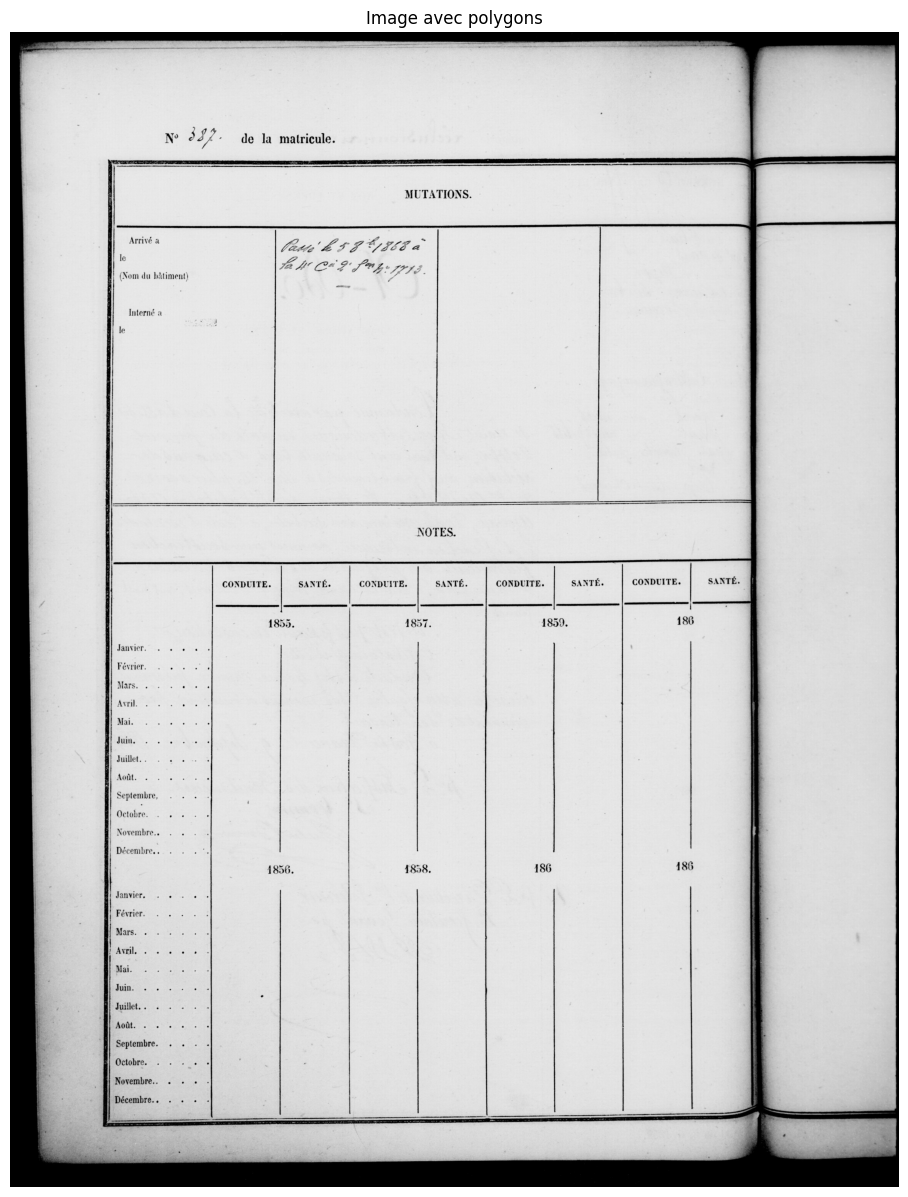

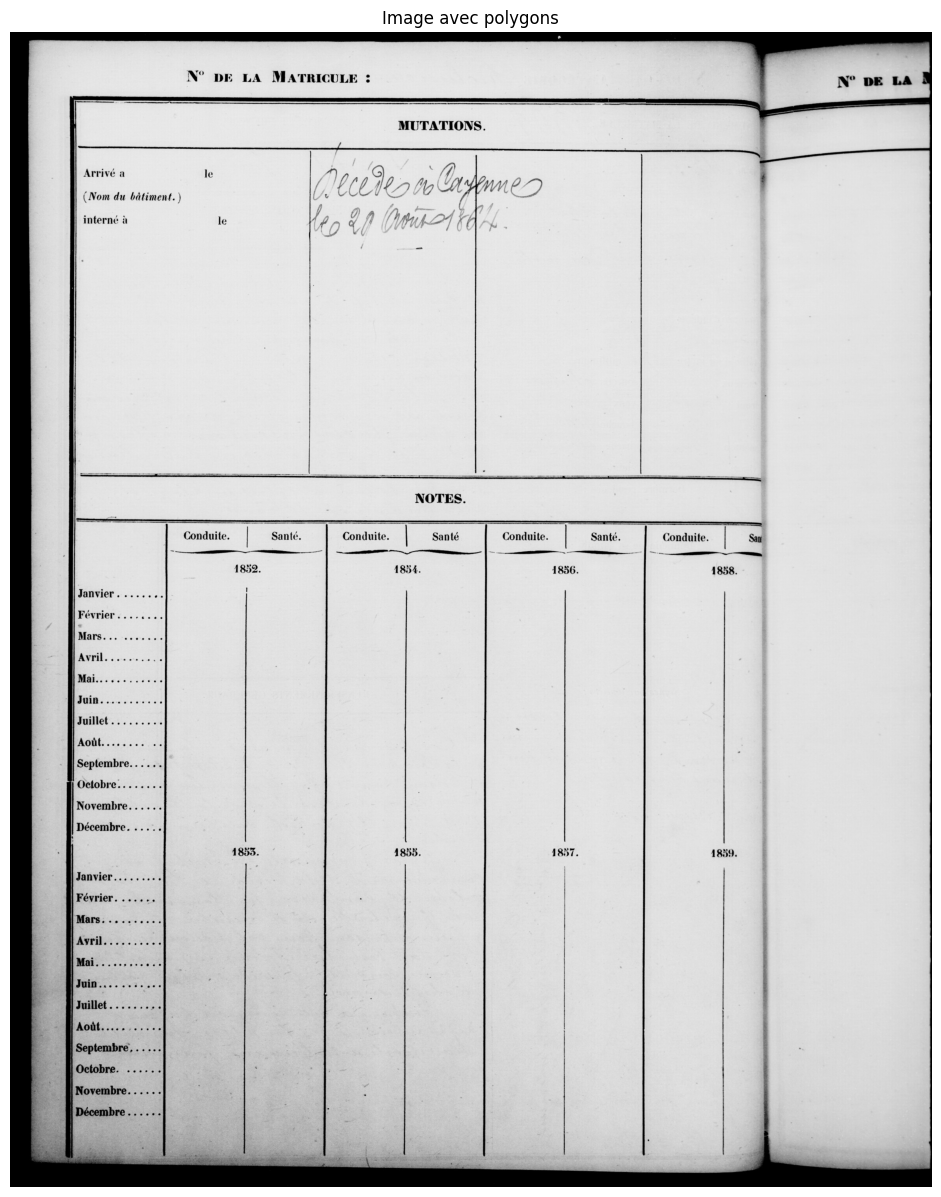

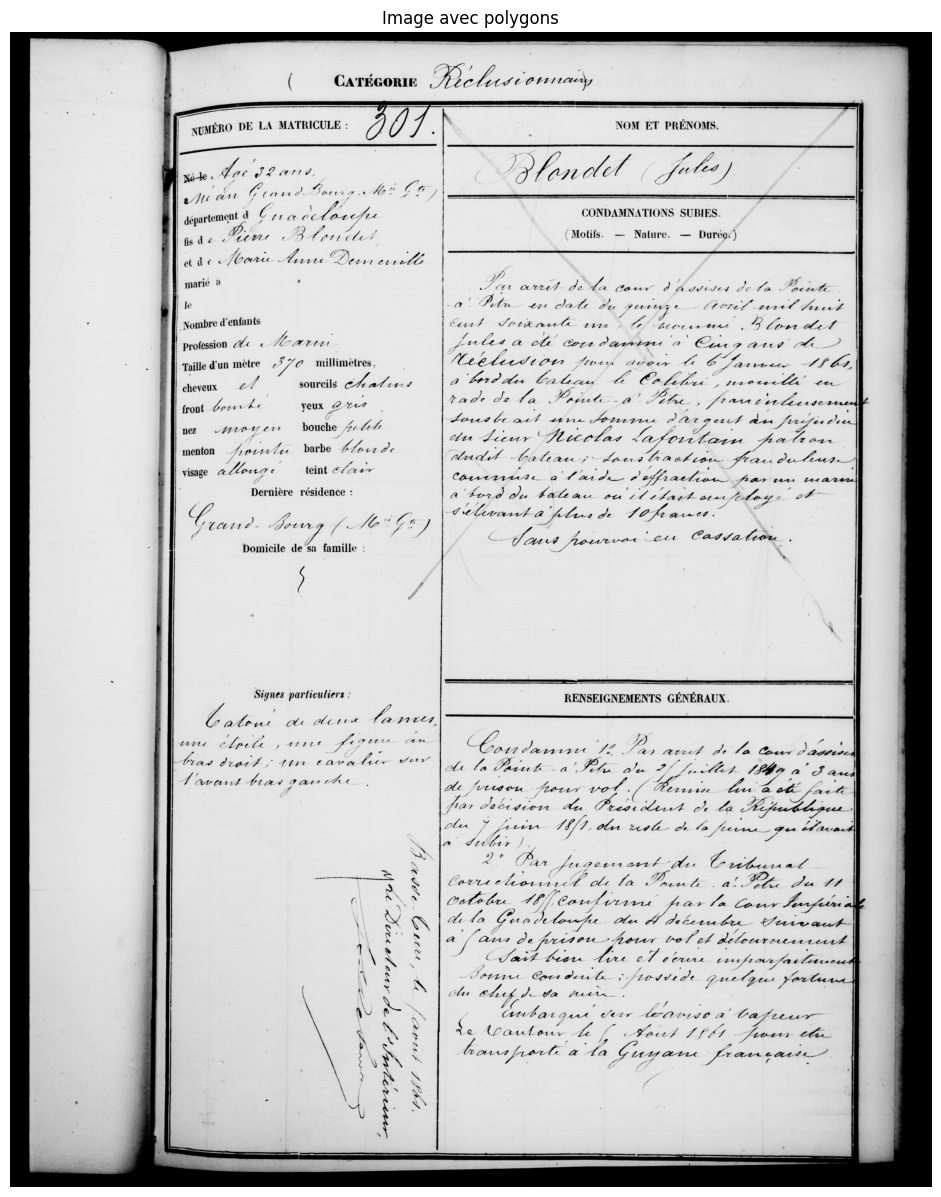

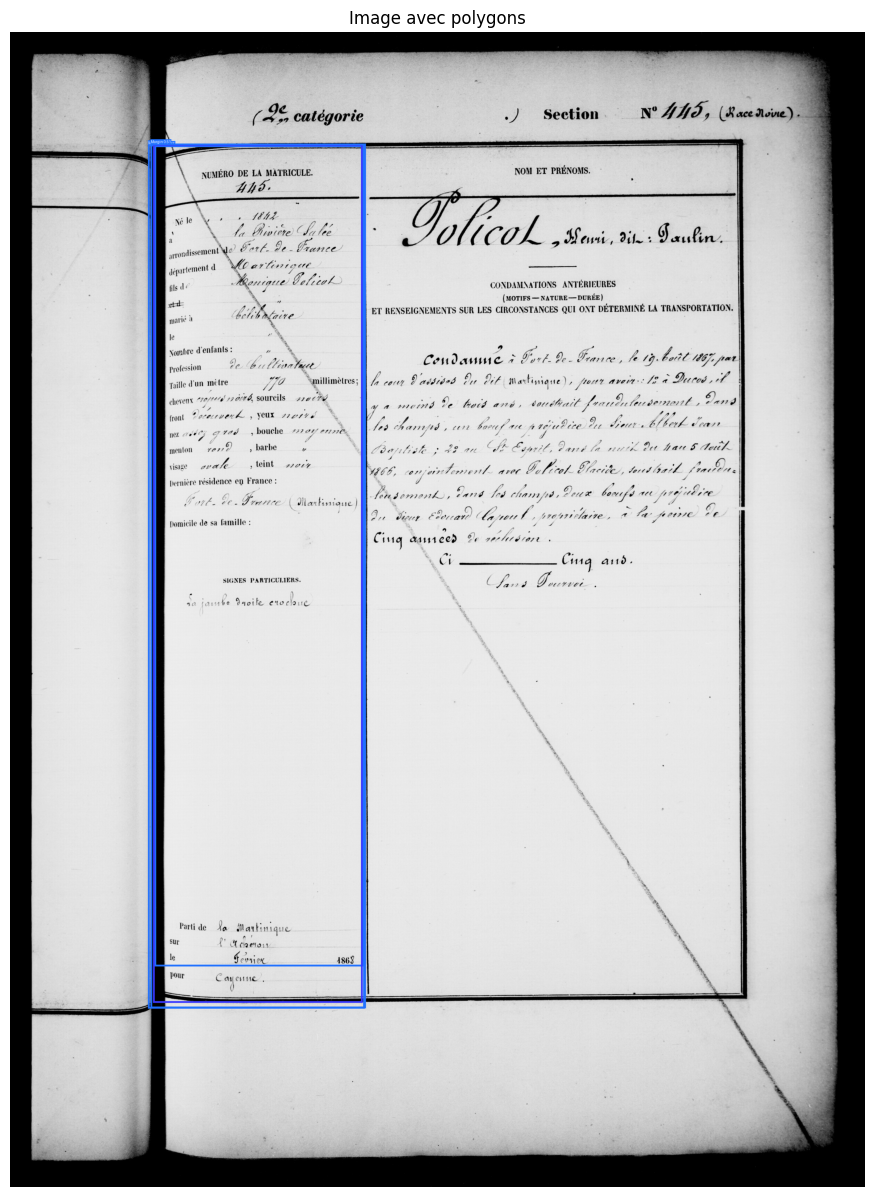

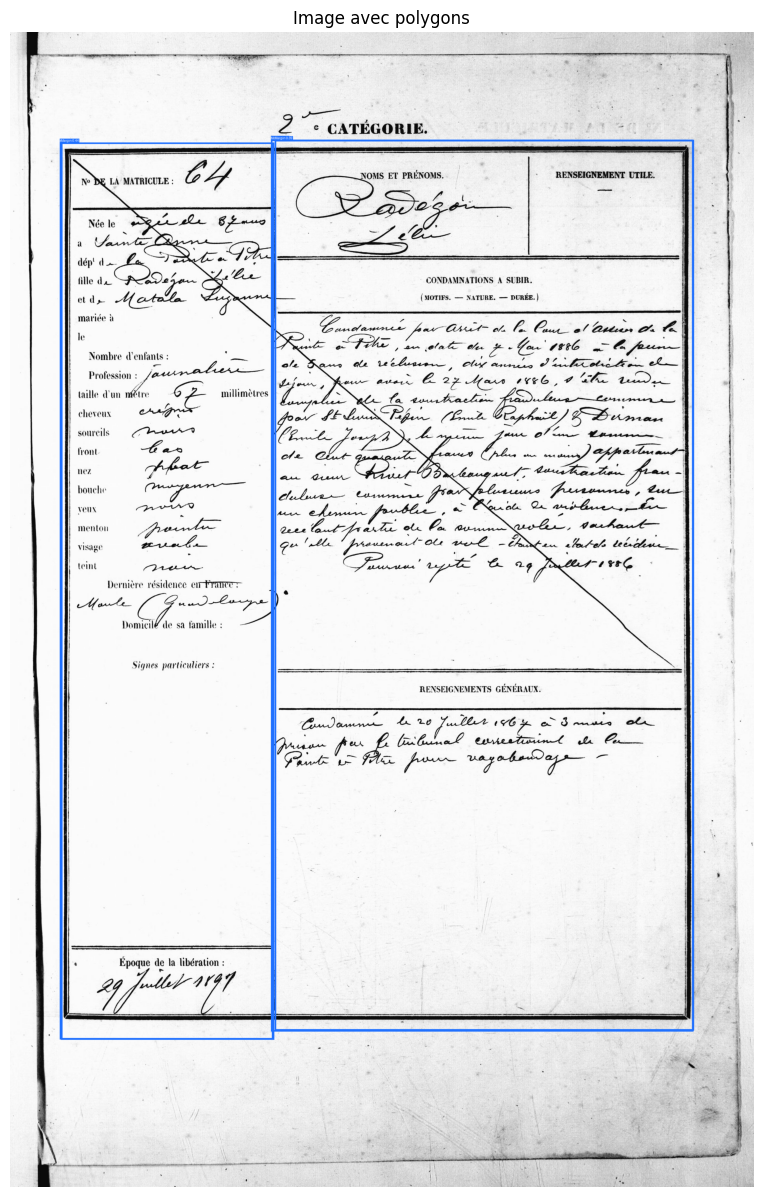

In [39]:
# Annotate the result
annotated_frames = []
for res in det_res:
    annotated_frame = res.plot(pil=True, line_width=5, font_size=20)
    plt.figure(figsize=(15, 15))
    plt.imshow(annotated_frame)
    plt.axis('off')
    plt.title("Image avec polygons")
    plt.show()